On this page, I conducted some basic data analysis based on my ideas.

In [2]:
# import useful library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Section1 Online and in-person course
part1:Online Course Percentage by Year for Different Departments-line chart
Part2:Online Course Percentage by Year and semeter for Different Departments - histogram


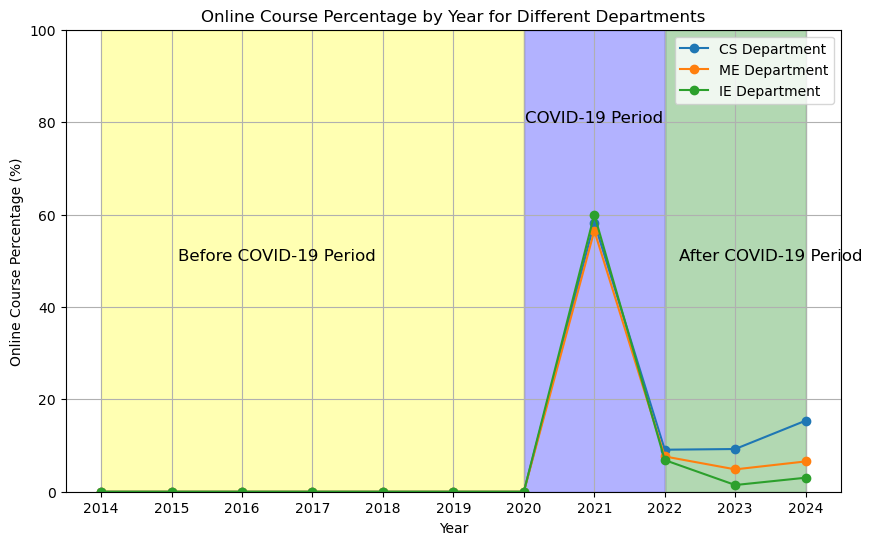

In [3]:
# Part 1
# Online Course Percentage by Year for Different Departments - line chart

# get data in CS department
cs_data = pd.read_csv('uic_CS_lectures_all_semesters.csv')
# mark online course
cs_data['Is_Online'] = cs_data['Method'].str.contains('Online', case=False, na=False)
# calculate the ratio of online course for each year
cs_online_ratio_by_year = cs_data.groupby('Year')['Is_Online'].mean() * 100
# Create new table
cs_online_ratio_df = cs_online_ratio_by_year.reset_index()
cs_online_ratio_df.columns = ['Year', 'Online_Course_Percentage']
#print(cs_online_ratio_df)

# get data in IE department
ie_data = pd.read_csv('uic_IE_lectures_all_semesters.csv')
# mark online course
ie_data['Is_Online'] = ie_data['Method'].str.contains('Online', case=False, na=False)
# calculate the ratio of online course for each year
ie_online_ratio_by_year = ie_data.groupby('Year')['Is_Online'].mean() * 100
# Create new table
ie_online_ratio_df = ie_online_ratio_by_year.reset_index()
ie_online_ratio_df.columns = ['Year', 'Online_Course_Percentage']
#print(ie_online_ratio_df)

# get data in ME department
me_data = pd.read_csv('uic_ME_lectures_all_semesters.csv')
# mark online course
me_data['Is_Online'] = me_data['Method'].str.contains('Online', case=False, na=False)
# calculate the ratio of online course for each year
me_online_ratio_by_year = me_data.groupby('Year')['Is_Online'].mean() * 100
# Create new table
me_online_ratio_df = me_online_ratio_by_year.reset_index()
me_online_ratio_df.columns = ['Year', 'Online_Course_Percentage']
#print(me_online_ratio_df)

plt.figure(figsize=(10, 6))
plt.plot(cs_online_ratio_df['Year'], cs_online_ratio_df['Online_Course_Percentage'], marker='o', linestyle='-', label='CS Department')
plt.plot(me_online_ratio_df['Year'], me_online_ratio_df['Online_Course_Percentage'], marker='o', linestyle='-', label='ME Department')
plt.plot(ie_online_ratio_df['Year'], ie_online_ratio_df['Online_Course_Percentage'], marker='o', linestyle='-', label='IE Department')

# add background
plt.axvspan(2014, 2020, color='yellow', alpha=0.3)
plt.text(2016.5, 50, 'Before COVID-19 Period', color='black', fontsize=12, ha='center')
plt.axvspan(2020, 2022, color='blue', alpha=0.3)
plt.text(2021, 80, 'COVID-19 Period', color='black', fontsize=12, ha='center')
plt.axvspan(2022, 2024, color='green', alpha=0.3)
plt.text(2023.5, 50, 'After COVID-19 Period', color='black', fontsize=12, ha='center')


plt.title('Online Course Percentage by Year for Different Departments')
plt.xlabel('Year')
plt.ylabel('Online Course Percentage (%)')

plt.xticks(range(2014, 2025))
plt.ylim(0, 100)

plt.legend()
plt.grid(True)
plt.show()


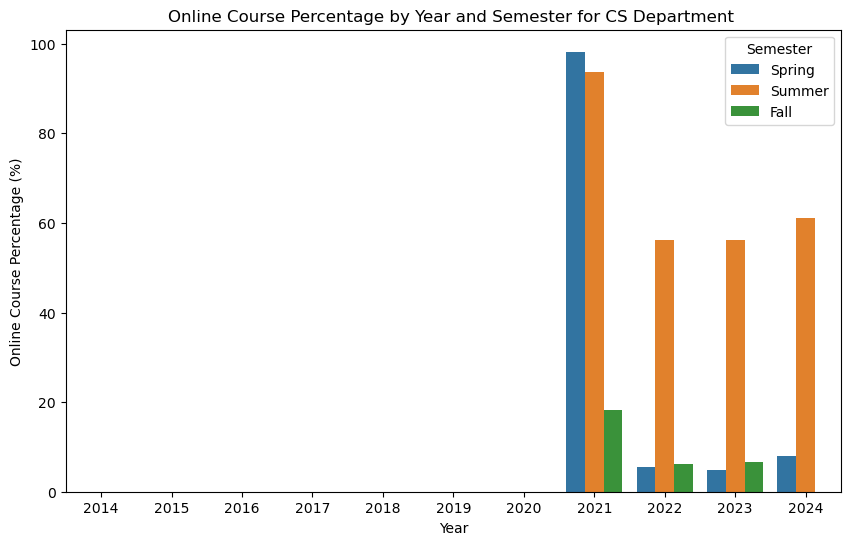

In [18]:
# Part2 
# Online Course Percentage by Year and semester for Different Departments - histogram
# CS Department
# calculate the ratio of online course for each semester
cs_online_ratio_by_semester = cs_data.groupby(['Year','Semester'])['Is_Online'].mean() * 100
# Create new table
cs_online_ratio_by_semester_df = cs_online_ratio_by_semester.reset_index()
cs_online_ratio_by_semester_df.columns = ['Year','Semester', 'Online_Course_Percentage']
# change the semester
semester_order = ["Spring", "Summer", "Fall"]
cs_online_ratio_by_semester_df['Semester'] = pd.Categorical(cs_online_ratio_by_semester_df['Semester'], categories=semester_order, ordered=True)
#print(cs_online_ratio_by_semester_df)
cs_online_ratio_by_semester_df['Year'] = cs_online_ratio_by_semester_df['Year'].astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(data=cs_online_ratio_by_semester_df, x="Year", y="Online_Course_Percentage", hue="Semester",dodge=True)

plt.title("Online Course Percentage by Year and Semester for CS Department ")
plt.xlabel("Year")
plt.ylabel("Online Course Percentage (%)")
plt.legend(title="Semester")

plt.show()